# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

# Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# Exibição dos dados

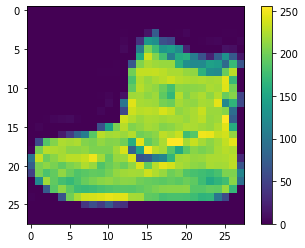

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

'''
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [5]:
imagens_treino = imagens_treino / 255.0

# Criando, compilando e treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  # keras.layers.Dense(128, activation=tensorflow.nn.relu),
  # keras.layers.Dense(64, activation=tensorflow.nn.relu),
  # keras.layers.Dense(32, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5257 - accuracy: 0.8123 - val_loss: 0.3990 - val_accuracy: 0.8583
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4004 - accuracy: 0.8544 - val_loss: 0.3759 - val_accuracy: 0.8652
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3616 - accuracy: 0.8671 - val_loss: 0.3575 - val_accuracy: 0.8708
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3405 - accuracy: 0.8744 - val_loss: 0.3467 - val_accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3231 - accuracy: 0.8809 - val_loss: 0.3449 - val_accuracy: 0.8733


# Salvando e carregando o modelo treinado

In [7]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurárcias de treino e validação por época

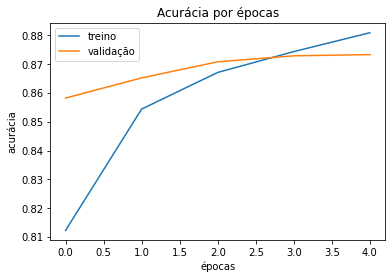

In [8]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

# Visualizando as perdas de treino e validação por época

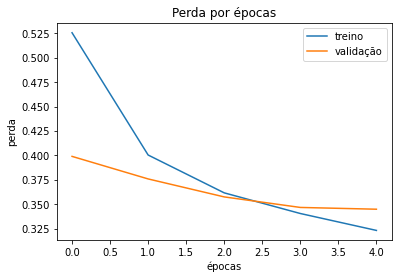

In [9]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Testando o modelo e o modelo salvo

In [10]:
testes = modelo.predict(imagens_teste)
print(f'Resultado teste: {np.argmax(testes[0])}')
print(f'Número da imagem de teste: {identificacoes_teste[0]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Resultado teste: {np.argmax(testes_modelo_salvo[0])}')
print(f'Número da imagem de teste: {identificacoes_teste[0]}')

Resultado teste: 9
Número da imagem de teste: 9
Resultado teste: 9
Número da imagem de teste: 9


# Avaliando o modelo

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste: {perda_teste}')
print(f'Acurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 47.8442 - accuracy: 0.8681
Perda do teste: 47.844215393066406
Acurácia do teste: 0.8680999875068665
